# Lab 03
Hao-Tien Kuo

## Section 1: Linear Algebra

In [3]:
import numpy as np
import pandas as pd
import altair as alt

In [8]:
m1 = np.array([[1,3,5],
              [4,12,8]]) 

m2 = np.array([[1,5,9],
              [3,4,15]]) 

print(f'Matrix m1:\n{m1}\n\nMatrix m2:\n{m2}')

Matrix m1:
[[ 1  3  5]
 [ 4 12  8]]

Matrix m2:
[[ 1  5  9]
 [ 3  4 15]]


In [11]:
# 1. Add m1 to m2 

m1+m2

array([[ 2,  8, 14],
       [ 7, 16, 23]])

In [14]:
# 2. Subtraction: m1 – m2

m1-m2

array([[ 0, -2, -4],
       [ 1,  8, -7]])

In [18]:
# 3. Matrix multiplication (you may have to transpose):

np.dot(m1.T, m2)

array([[ 13,  21,  69],
       [ 39,  63, 207],
       [ 29,  57, 165]])

In [23]:
np.dot(m2, m1.T)

# The two resultant matrices are not the same. 
# The first operation (3x2 @ 2x3) will result in a 3x3 matrix, while the second (2x3 * 3x2) will result in a 2x2.

array([[ 61, 136],
       [ 90, 180]])

In [37]:
# 4. Inversion

v1 = np.array([[2,6,7]])
m3 = np.append(m1, v1, axis=0)

print(f'Matrix m3:\n{m3}')

Matrix m3:
[[ 1  3  5]
 [ 4 12  8]
 [ 2  6  7]]


In [39]:
m3_i = np.linalg.inv(m3)

print(f'Matrix m3 inverse:\n{m3_i}')

LinAlgError: Singular matrix

In [40]:
np.linalg.det(m3)

# Inverting does not work because m3 has a determinant of 0 (singular matrix).

0.0

In [41]:
v2 = np.array([[2,0,7]])
m4 = np.append(m1, v2, axis=0)

print(f'Matrix m4:\n{m4}')

Matrix m4:
[[ 1  3  5]
 [ 4 12  8]
 [ 2  0  7]]


In [48]:
m4_i = np.linalg.inv(m4)

print(f'Matrix m4 inverse:\n{np.round(m4_i,3)}')

Matrix m4 inverse:
[[-1.167  0.292  0.5  ]
 [ 0.167  0.042 -0.167]
 [ 0.333 -0.083  0.   ]]


In [49]:
np.linalg.det(m4)

# Inverting works this time because m4 is not a singular matrix.

-72.0

In [50]:
# 5. Eigen vectors and values

values, vectors = np.linalg.eig(m4)

print(f'Eigenvalues of m4:\n{values}\n')
print(f'Eigenvectors of m4:\n{np.round(vectors,3)}')

Eigenvalues of m4:
[-0.74625347 13.70776234  7.03849113]

Eigenvectors of m4:
[[-0.958  0.258  0.01 ]
 [ 0.145  0.963 -0.852]
 [ 0.247  0.077  0.523]]


# Section 2: Probability

In [116]:
from numpy.random import seed
from numpy.random import normal

seed(155)

In [117]:
# 40 observations from a random normal distribution with a mean of 15 and standard deviation of 2

x1 = normal(loc=15, scale=2, size=40)
print('mean:', x1.mean(), '\nstandard deviation:', x1.std())

mean: 14.802853912665578 
standard deviation: 1.9250733678444107


In [118]:
# 40 observations from a random normal distribution with a mean of 17 and standard deviation of 1.5

x2 = normal(loc=17, scale=1.5, size=40)
print('mean:', x2.mean(), '\nstandard deviation:', x2.std())

mean: 16.78153023473677 
standard deviation: 1.4364978771441093


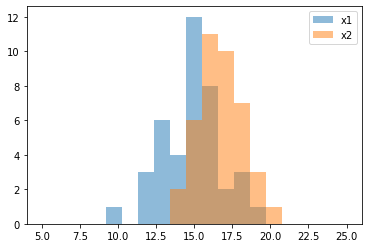

In [119]:
# Produce histograms of these distributions on the same plot

from matplotlib import pyplot
bins = np.linspace(5, 25, 20)

pyplot.hist(x1, bins, alpha=0.5, label='x1')
pyplot.hist(x2, bins, alpha=0.5, label='x2')
pyplot.legend(loc='upper right')
pyplot.show()

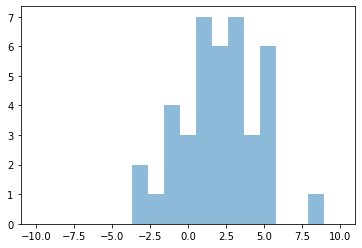

In [120]:
# Subtract the first set of observations from the second set to get x3. 
# Produce a histogram of the differences. What is the distribution of x3?

x3 = x2-x1

bins = np.linspace(-10, 10, 20)
pyplot.hist(x3, bins, alpha=0.5, label='x3')
pyplot.show()

In [121]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(x3)

# x3 is also normally distributed.

ShapiroResult(statistic=0.9871357083320618, pvalue=0.9226647019386292)

# Section 3: Statistics

In [122]:
# 1. Compute the mean, median, & mode for x1, x2, & x3.

import statistics

def get_central(i):
    mean = statistics.mean(i)
    median = statistics.median(i)
    mode = statistics.mode(i)
    print('Mean: %.3f \nMedian: %.3f \nMode: %.3f' %(mean, median, mode))

In [123]:
get_central(x1)

Mean: 14.803 
Median: 14.896 
Mode: 16.249


In [124]:
get_central(x2)

Mean: 16.782 
Median: 16.799 
Mode: 15.853


In [125]:
get_central(x3)

Mean: 1.979 
Median: 1.993 
Mode: -0.395


In [126]:
x3

# Since all the numbers in x3 are different, the mode function just returns the first number.

array([-0.39524742,  0.79159031,  1.27152566,  3.71564404,  2.35096606,
        4.48226017,  2.75680327,  8.62219809,  1.44998381, -1.44821174,
       -2.31264633, -0.72464436, -1.46995433,  5.49637933, -3.42928537,
        2.65709979,  3.07542014,  0.4404589 ,  4.01861796,  1.57882306,
        4.94683799,  5.38759072,  1.86942849,  2.25093668, -1.24696168,
       -0.44412062,  3.6638025 ,  2.99017703,  5.7384276 ,  1.16074087,
        3.34491232, -3.28521394,  1.66867393,  0.75280176,  5.05738211,
        0.54881634,  1.63297305,  2.77578221,  2.11587583,  5.29040863])

In [127]:
statistics.mode(x3.round())

# The actual mode is around 2.

2.0

In [128]:
# 2. Compute the sample variance, sample standard deviation, and standard error for x1, x2, & x3.

def get_dispersion(i):
    var = statistics.variance(i)
    sd = statistics.stdev(i)
    se = np.std(i, ddof=1) / np.sqrt(np.size(i))
    print('Variance: %.3f \nStandard deviation: %.3f \nStandard error: %.3f' %(var, sd, se))

In [129]:
get_dispersion(x1)

Variance: 3.801 
Standard deviation: 1.950 
Standard error: 0.308


In [130]:
get_dispersion(x2)

Variance: 2.116 
Standard deviation: 1.455 
Standard error: 0.230


In [131]:
get_dispersion(x3)

Variance: 6.954 
Standard deviation: 2.637 
Standard error: 0.417


In [135]:
# 3. For x1 and x2
# a. Compute the range

range_1 = max(x1)-min(x1)
range_2 = max(x2)-min(x2)

print('Range of x1: %.3f \nRange of x2: %.3f' %(range_1, range_2))

Range of x1: 8.654 
Range of x2: 6.868


In [140]:
# b. Find Q1 and Q2

q1_1 = np.quantile(x1, 0.25)
q2_1 = np.quantile(x1, 0.5)
print('For x1, Q1 = %.3f and Q2 = %.3f' %(q1_1,q2_1))

q1_2 = np.quantile(x2, 0.25)
q2_2 = np.quantile(x2, 0.5)
print('For x2, Q1 = %.3f and Q2 = %.3f' %(q1_2,q2_2))

For x1, Q1 = 13.367 and Q2 = 14.896
For x2, Q1 = 15.824 and Q2 = 16.799


In [141]:
# c. Compute the IQR

iqr_1 = np.quantile(x1, 0.75) - np.quantile(x1, 0.25)
print('For x1, IQR = %.3f' % iqr_1)

iqr_2 = np.quantile(x2, 0.75) - np.quantile(x2, 0.25)
print('For x2, IQR = %.3f' % iqr_2)

For x1, IQR = 2.598
For x2, IQR = 1.960
